In [1]:
import tensorflow as tf

In [4]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import sys
import os

In [5]:
%matplotlib inline

(319, 220, 3) uint8


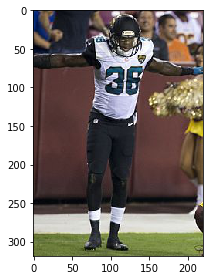

In [16]:
img=io.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/James_Sample_%28American_football%29.jpg/220px-James_Sample_%28American_football%29.jpg")
io.imshow(img)
print(img.shape,img.dtype)

In [13]:
#convert images to string representation
stringer=img.tostring()

In [20]:
#reconstruct the image back 
reconstructed_cat_1d = np.frombuffer(stringer, dtype=np.uint8)
back_to_original=reconstructed_cat_1d.reshape(img.shape)

In [22]:
#check if everything is fine
print(np.allclose(img, back_to_original))

True


In [47]:
from random import shuffle
import glob
shuffle_data=True
path="PetImages/"
address=[]
values=[]
labels=os.listdir(path)
for i in labels:
    
    address.extend(glob.glob(path+i+"/*"))
    values.extend([1]*len(glob.glob(path+i+"/*")) if i=="Cat" else [0]*len(glob.glob(path+i+"/*")))
    

In [55]:
if shuffle_data:
    c=list(zip(address,values))
    shuffle(c)
    address,values=zip(*c)

In [65]:
x_valid=address[0:int(0.2*len(address))]
y_valid=values[0:int(0.2*len(values))]

x_test=address[int(0.2*len(address)):int(0.4*len(address))]
y_test=values[int(0.2*len(values)):int(0.4*len(values))]

x_train=address[int(0.4*len(address)):]
y_train=values[int(0.4*len(values)):]

In [66]:
import cv2

In [67]:
def processed_image(addr):
   
    img = cv2.imread(addr)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)
    return img

In [27]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [28]:
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [30]:
def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

In [32]:
#address for saving tfrecord
name="sample.tfrecords"

In [33]:
#open tfrecords file
writer=tf.python_io.TFRecordWriter(name)

In [81]:
count=0
for i in range(len(x_train)):
    if not i % 1000:
        print('Train data: {}/{}'.format(i, len(x_train)))
        sys.stdout.flush()
    try:
        img = processed_image(x_train[i])
        label = y_train[i]
        # Create a feature
        feature = {'train/label': _int64_feature(label),
                   'train/image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
        # Create an example protocol buffer
        example = tf.train.Example(features=tf.train.Features(feature=feature))
        # Serialize to string and write on the file
        writer.write(example.SerializeToString())
    except:
        count+=1
writer.close()

Train data: 0/15002
Train data: 1000/15002
Train data: 2000/15002
Train data: 3000/15002
Train data: 4000/15002
Train data: 5000/15002
Train data: 6000/15002
Train data: 7000/15002
Train data: 8000/15002
Train data: 9000/15002
Train data: 10000/15002
Train data: 11000/15002
Train data: 12000/15002
Train data: 13000/15002
Train data: 14000/15002
Train data: 15000/15002
